# Vodafone Customer Churn Project

### **Project Description**
#### Customer Churn is the percentage of customers that stopped using a companys' product or service during a certain time frame.In business, understanding the primary cause of a customer churn can assist businesses to create a retention strategy to reduce customer churn and as such boost revenue.This project seeks to build a powerful machine learning pipeline that will estimate or predict the likelihood of a customer leaving vodafone or not.

### **Null Hypothesis**: Customers with high monthly charges do not have the tendency to churn

### **Alternate Hypothesis**:Customers with high monthly Charges have the tendency to churn

### **Analytical Questions**
#### 1.  Which payment method is the most popular?
#### 2.  Which internet service was purchased the most?
#### 3.  Which gender recorded the highest churn
#### 4.  Which one of the contract types did the highest churn
#### 5.  Which age group did the highest churn
#### 6.  Does high monthly charges affect the churn rate

In [210]:
# Data manipulation packages
import pandas as pd  # Pandas provides data structures for efficiently storing large datasets and tools for data analysis.
import numpy as np   # NumPy is used for numerical operations and array manipulations.

# Data Visualization packages
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library for creating static, animated, and interactive visualizations in Python.
import seaborn as sns  # Seaborn is a statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

# Machine learning Packages
from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer  # ColumnTransformer allows applying different transformers to different columns in a dataset.
from sklearn.impute import SimpleImputer  # SimpleImputer is used for handling missing data by imputing missing values with specified strategies.
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # These classes provide different methods for scaling/normalizing numerical features.
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder  # These classes handle categorical feature encoding (one-hot, label, and ordinal encoding).
from sklearn.preprocessing import FunctionTransformer  # FunctionTransformer allows applying custom functions to transform data.
from sklearn.tree import DecisionTreeClassifier  # DecisionTreeClassifier is an implementation of a decision tree classifier.
from sklearn.metrics import accuracy_score, classification_report  # These metrics are used for evaluating classification model performance.
from sklearn.model_selection import train_test_split  # train_test_split is used to split a dataset into training and testing sets.
from sklearn import set_config  # set_config allows configuring global scikit-learn behavior.
from sklearn.ensemble import RandomForestClassifier  # RandomForestClassifier is an ensemble learning method based on decision trees.
from sklearn.svm import SVC  # Support Vector Classifier (SVC) is a classifier that uses support vector machines for classification.
from sklearn.preprocessing import PowerTransformer  # PowerTransformer applies power transformations to make data more Gaussian-like.
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes is a probabilistic classifier based on the Gaussian distribution.
from sklearn.ensemble import GradientBoostingClassifier  # GradientBoostingClassifier is an ensemble method that builds a sequence of weak learners (trees).
from scipy.stats import pearsonr  # Pearson correlation coefficient measures the linear relationship between two variables.
from sklearn.model_selection import cross_val_score  # cross_val_score is used for cross-validated model performance evaluation.
from imblearn.under_sampling import RandomUnderSampler  # RandomUnderSampler is used for under-sampling to address class imbalance.
from imblearn.over_sampling import RandomOverSampler, SMOTE  # RandomOverSampler and SMOTE are used for over-sampling to address class imbalance.
from sklearn.feature_selection import SelectKBest, mutual_info_classif  # SelectKBest performs feature selection based on scoring functions like mutual information.
from imblearn.over_sampling import SMOTE  # SMOTE is a technique for generating synthetic samples to address class imbalance.
from sklearn.datasets import make_classification  # make_classification generates a synthetic dataset for classification.
from sklearn.metrics import roc_curve, roc_auc_score  # roc_curve and roc_auc_score are used for Receiver Operating Characteristic (ROC) curve analysis.
from sklearn.metrics import confusion_matrix  # confusion_matrix calculates the confusion matrix for classification models.
from sklearn.model_selection import GridSearchCV  # GridSearchCV performs hyperparameter tuning using grid search.
import joblib
import os







# Database connection package
import pyodbc  # PyODBC is a Python module that makes accessing ODBC databases simple.
from dotenv import dotenv_values  # dotenv loads environment variables from a .env file.

# Ignore warnings (optional)
import warnings  # The warnings module provides a way to handle warnings in Python.
warnings.filterwarnings("ignore")


# Step 1: Data Exploration and Understanding

Load your dataset into a Pandas DataFrame.

In [211]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server_name")
database = environment_variables.get("database_name")
username = environment_variables.get("username")
password = environment_variables.get("password")

In [212]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinP"

In [213]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server 


connection = pyodbc.connect(connection_string)

In [214]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

query = "SELECT * FROM LP2_Telco_churn_first_3000"

First_Churn = pd.read_sql(query, connection)

In [215]:

# Load the third dataset (it's a CSV file named 'LP2_Telco-churn-last-2000.csv')
data_3 = pd.read_csv('LP2_Telco-churn-last-2000.csv')

In [216]:
data_3.describe(include ='object').T

,count,unique,top,freq
customerID,2043,2043,5600-PDUJF,1
gender,2043,2,Male,1022
Partner,2043,2,No,1047
Dependents,2043,2,No,1412
PhoneService,2043,2,Yes,1823
MultipleLines,2043,3,No,987
InternetService,2043,3,Fiber optic,905
OnlineSecurity,2043,3,No,1029
OnlineBackup,2043,3,No,911
DeviceProtection,2043,3,No,923


In [217]:
First_Churn.describe(include ='object').T

,count,unique,top,freq
customerID,3000,3000,7590-VHVEG,1
gender,3000,2,Male,1537
MultipleLines,2731,2,False,1437
InternetService,3000,3,Fiber optic,1343
OnlineSecurity,2349,2,False,1478
OnlineBackup,2349,2,False,1320
DeviceProtection,2349,2,False,1296
TechSupport,2349,2,False,1476
StreamingTV,2349,2,False,1190
StreamingMovies,2349,2,True,1199


In [218]:
First_Churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [219]:
First_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [220]:
data_3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [221]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


# Step 2: Data Cleaning 

### List of things to do

- `Convert Some Columns Representations to Boolean`
- `Missing Value`


In [222]:
# Convert a column to a numeric type
data_3['TotalCharges'] = pd.to_numeric(data_3['TotalCharges'], errors='coerce', downcast= 'float')


In [223]:
# List of columns to be converted to boolean 
boolean_columns_first_data = ['Partner', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'MultipleLines',
                               'Dependents', 'PhoneService', 'TechSupport', 'StreamingMovies', 'StreamingTV', 'PaperlessBilling']

# Function to convert "Yes", "No", to True and False
def map_yes_no_to_boolean(value):
    return value.lower() == 'yes'

# Iterate through the list and convert corresponding columns in data_3 to boolean type
for column in boolean_columns_first_data:
    data_3[column] = data_3[column].map(map_yes_no_to_boolean)


We have a column with integer values 0 and 1, Yes and No want to convert them to boolean values (`False` and `True`), you can use the `astype` 



In [224]:
# We converted the yes&no to True and Yes 

def map_yes_no_to_bool(value):
    return value.lower()=='yes'

data_3['Churn'] = data_3['Churn'].map(map_yes_no_to_bool)

In [225]:
#Senior column' is the column I  want to convert

data_3['SeniorCitizen'] = data_3['SeniorCitizen'].astype(bool)

##SQL Data set 

In [226]:
# Check for missing values in each column
First_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [227]:
# List of columns to be converted to boolean 
boolean_columns_second_data = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'MultipleLines', 
                               'TechSupport', 'StreamingMovies', 'StreamingTV']

for column in boolean_columns_second_data:
    First_Churn[column] = First_Churn[column].astype(bool)

In [228]:
# Convert the Churn into a boolean Column

First_Churn['Churn'] = First_Churn['Churn'].astype(bool)

In [229]:
# Check for missing values in each column
print(First_Churn.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        5
Churn               0
dtype: int64


In [230]:
# Check for missing values in each column
print(data_3.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
Churn               0
dtype: int64


In [231]:
for column in data_3:
    print(column, data_3[column].nunique())

customerID 2043
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
MultipleLines 2
InternetService 3
OnlineSecurity 2
OnlineBackup 2
DeviceProtection 2
TechSupport 2
StreamingTV 2
StreamingMovies 2
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1029
TotalCharges 1990
Churn 2


In [232]:
data_3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,False,False,False,6,True,False,DSL,False,...,False,True,False,False,Month-to-month,True,Credit card (automatic),49.50,312.700012,False
1,8292-TYSPY,Male,False,False,False,19,True,False,DSL,False,...,True,True,False,False,Month-to-month,True,Credit card (automatic),55.00,1046.500000,True
2,0567-XRHCU,Female,False,True,True,69,False,False,DSL,True,...,True,False,False,True,Two year,True,Credit card (automatic),43.95,2960.100098,False
3,1867-BDVFH,Male,False,True,True,11,True,True,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,74.35,834.200012,True
4,2067-QYTCF,Female,False,True,False,64,True,True,Fiber optic,False,...,True,True,True,True,Month-to-month,True,Electronic check,111.15,6953.399902,False


In [233]:
First_Churn['Churn'].unique()

array([False,  True])

In [234]:
First_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     3000 non-null   bool   
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    3000 non-null   bool   
 10  OnlineBackup      3000 non-null   bool   
 11  DeviceProtection  3000 non-null   bool   
 12  TechSupport       3000 non-null   bool   
 13  StreamingTV       3000 non-null   bool   
 14  StreamingMovies   3000 non-null   bool   
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


## Concat the SQL and CSV data


In [235]:
#Merging the SQL and CSV dataset

vodafone_df= pd.concat([First_Churn,data_3])

vodafone_df.to_csv('vodafone_customer_churn.csv')

In [236]:
voda_df= pd.read_csv('vodafone_customer_churn.csv')

`column_to_drop' is the Unnamed & CustomerID`

In [237]:

voda_df = voda_df.drop(columns=['Unnamed: 0'])

voda_df = voda_df.drop(columns=['customerID'])


In [238]:
voda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   bool   
 2   Partner           5043 non-null   bool   
 3   Dependents        5043 non-null   bool   
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   bool   
 6   MultipleLines     5043 non-null   bool   
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    5043 non-null   bool   
 9   OnlineBackup      5043 non-null   bool   
 10  DeviceProtection  5043 non-null   bool   
 11  TechSupport       5043 non-null   bool   
 12  StreamingTV       5043 non-null   bool   
 13  StreamingMovies   5043 non-null   bool   
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   bool   
 16  PaymentMethod     5043 non-null   object 


## Data Exploration:


Use descriptive statistics and visualizations to understand the distribution of variables, identify outliers, and get a sense of the data.

<Axes: >

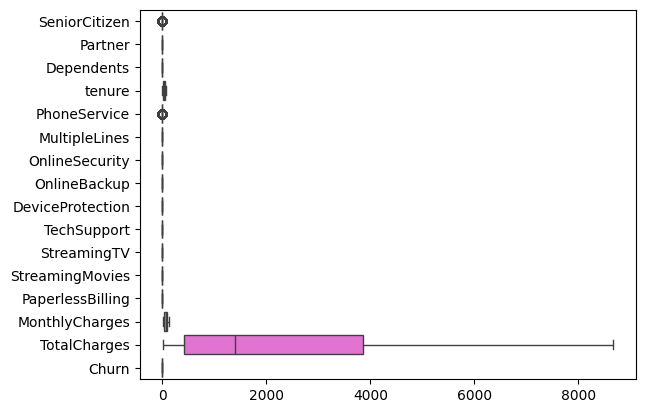

In [239]:
# Boxplot Visualization

sns.boxplot(data=voda_df, orient='h')

 Count Plots for Categorical Columns

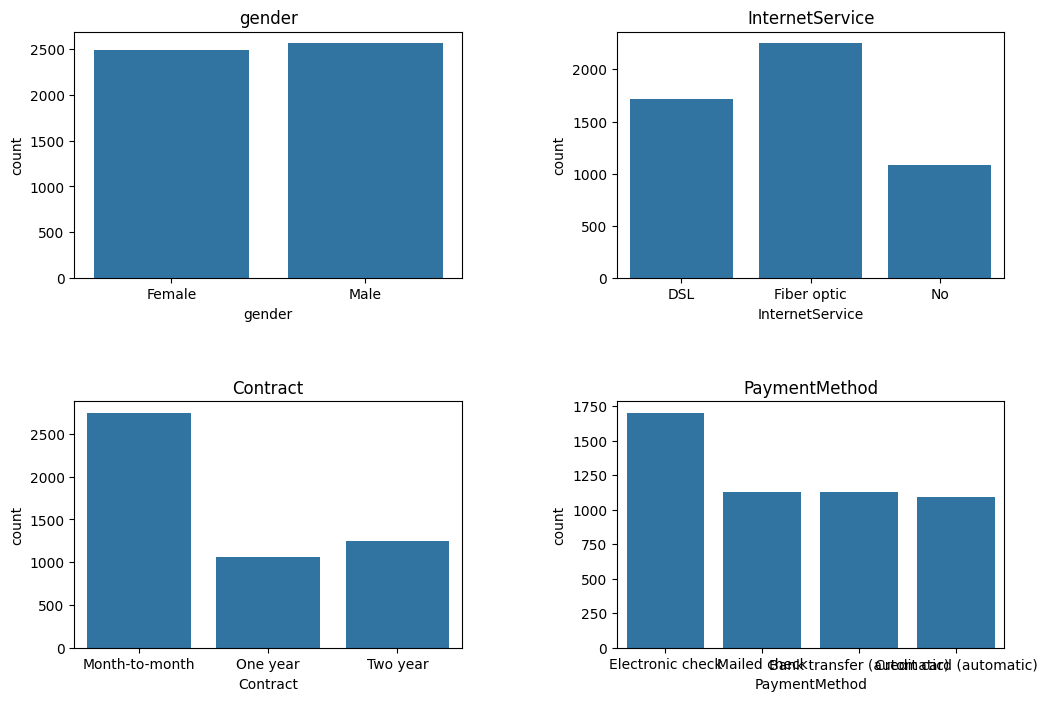

In [240]:
# List of columns containing categorical values
categorical_columns = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

# Set up subplots for better visibility with adjusted size
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjust vertical and horizontal spacing

# Flatten the 2D axes array to make it easier to iterate
axes = axes.flatten()

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    # Create a count plot using Seaborn
    sns.countplot(data=voda_df, x=column, ax=axes[i])

    # Add a title to the count plot with the name of the column
    axes[i].set_title(column)

# Hide empty subplots
for i in range(len(categorical_columns), len(axes)):
    axes[i].axis('off')

# Show the count plots
plt.show()


Histograms for Numerical Columns

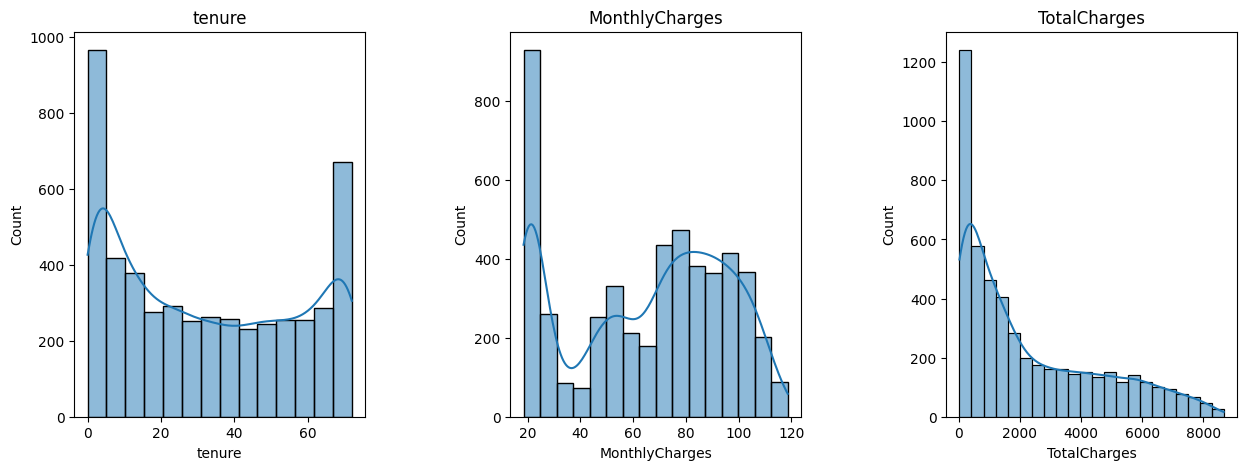

In [241]:

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Set up subplots for better visibility
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)  # Adjust horizontal spacing

# Loop through each numerical column
for i, column in enumerate(numerical_columns):
    # Create a histogram using Seaborn
    sns.histplot(data=voda_df, x=column, kde=True, ax=axes[i])

    # Add a title to the histogram with the name of the column
    axes[i].set_title(column)

# Show the subplots for numerical histograms
plt.show()


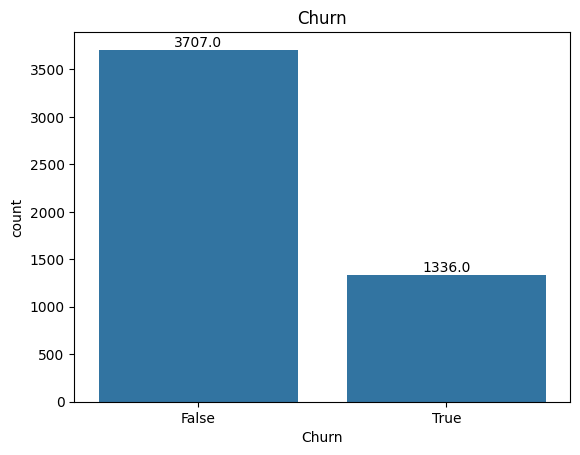

In [242]:

# Create a count plot for the 'Churn' column
sns.countplot(data=voda_df, x='Churn')

# Add count annotations to each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=10)

# Add a title to the count plot
plt.title('Churn')

# Show the count plot
plt.show()


                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.240645      0.826264
MonthlyCharges  0.240645        1.000000      0.647007
TotalCharges    0.826264        0.647007      1.000000


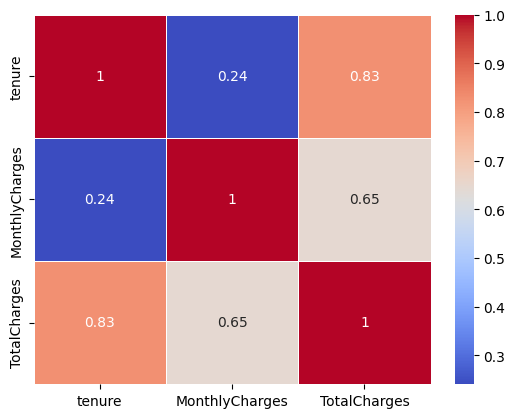

In [243]:
numeric_columns = voda_df.select_dtypes(include=['number']).columns
correlation_matrix = voda_df[numeric_columns].corr()

# Display the correlation matrix
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

## Answering the Analytical Questions

1.Which payment method is the most popular?

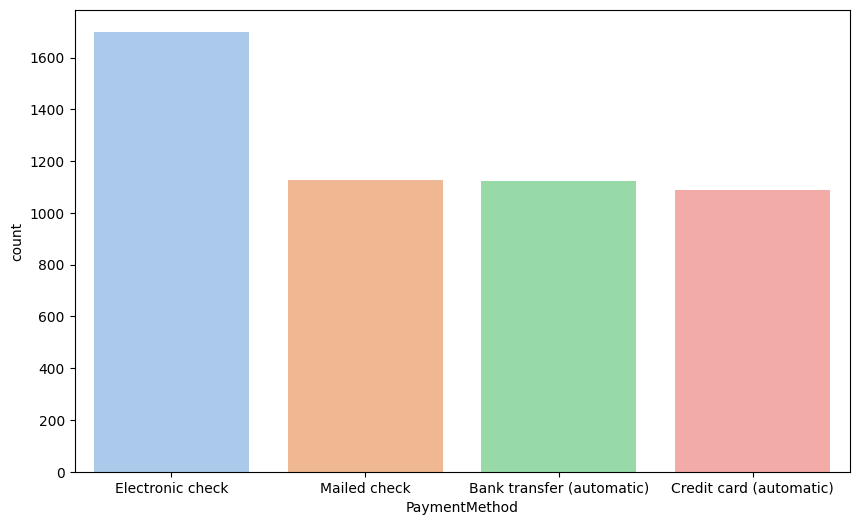

In [244]:

plt.figure(figsize=(10,6))
sns.countplot(data=voda_df, x='PaymentMethod', palette="pastel")
plt.show()

  2.Which internet service was purchased the most?

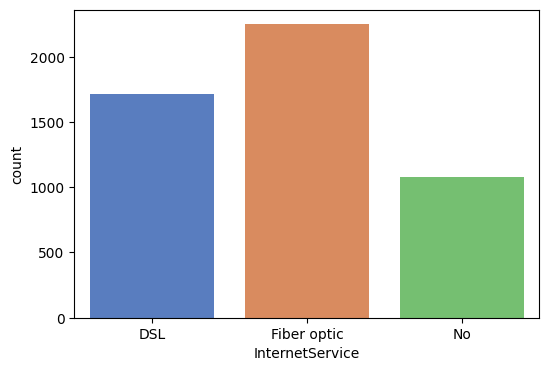

In [245]:
plt.figure(figsize=(6,4))
sns.countplot(data=voda_df, x='InternetService', palette="muted")
plt.show()

3.Which gender recorded the highest churn

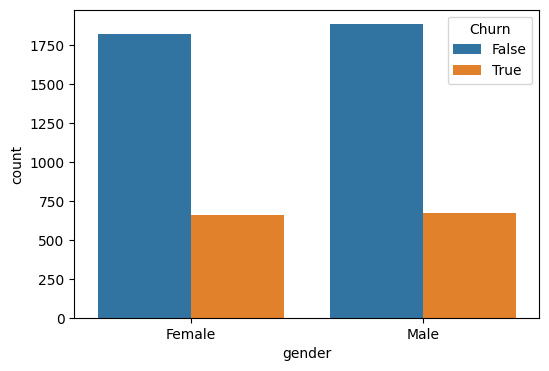

In [246]:
plt.figure(figsize=(6,4))
sns.countplot(data=voda_df, x='gender', hue="Churn")
plt.show()

4. Which one of the contract types did the highest churn

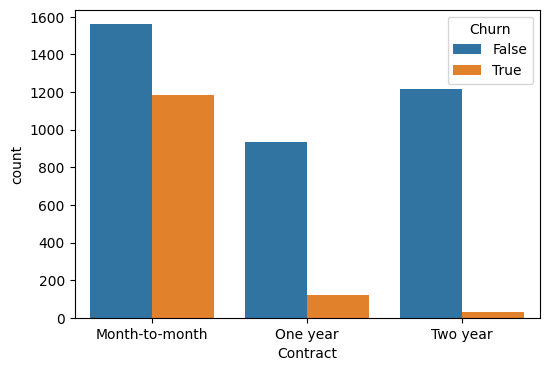

In [247]:
plt.figure(figsize=(6,4))
sns.countplot(data=voda_df, x='Contract', hue="Churn")
plt.show()

5.Which age group did the highest churn


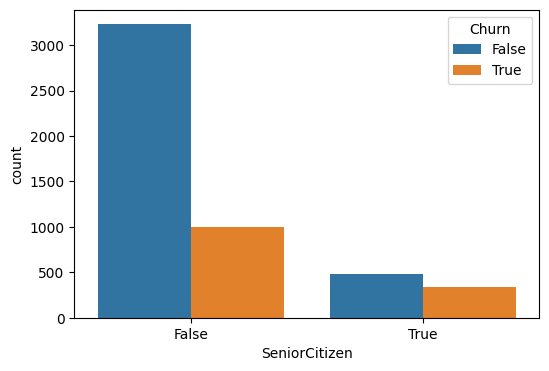

In [248]:
plt.figure(figsize=(6,4))
sns.countplot(data=voda_df, x='SeniorCitizen', hue="Churn")
plt.show()

## Insights

`It can be seen from the graph that,non senior citizens(0) has the highest churn compared to senior citizens. however,over 80 % of senior citizens churned compared to about 40% of the non senior citizens that churned. we therefore conclude that senior citizens churned the most`

## Hypothesis 



 **Null Hypothesis**: Customers with high monthly charges do not have the tendency to churn

 **Alternate Hypothesis**:Customers with high monthly Charges have the tendency to churn

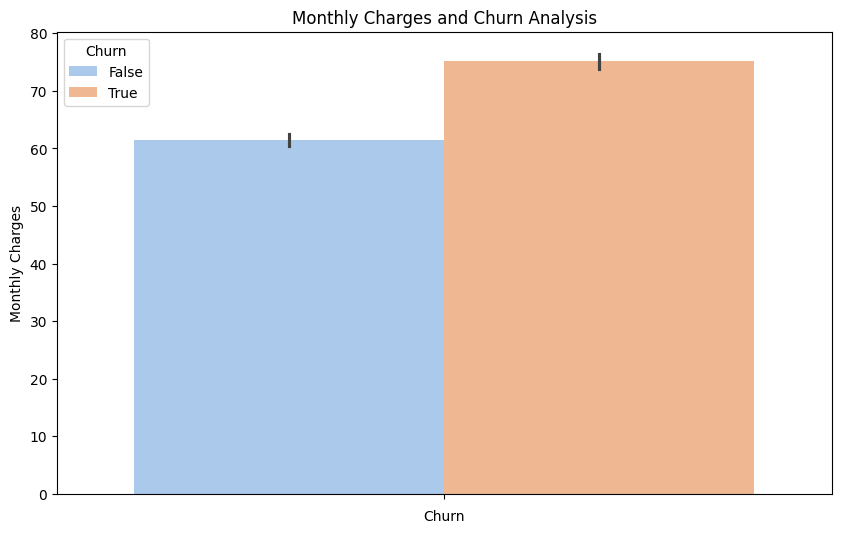

In [249]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=voda_df, y='MonthlyCharges', hue="Churn", palette="pastel")

# Add labels and title
plt.title('Monthly Charges and Churn Analysis')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

# Add a legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title='Churn')

plt.show()


##  `Phase 3 - Data Preparation`

Data Preparation also known as **data preprocessing**, is a crucial phase in the machine learning pipeline. It involves cleaning, transforming, and structuring raw data into a format that is suitable for analysis and model building. Data preparation aims to improve the quality of the data and enhance the performance of machine learning models. This phase lays the foundation for accurate and meaningful analysis and predictions.

- **Train-test split**: Divide the data into training and testing sets for model evaluation.
- **Clean and preprocess data: Handle missing values, outliers, and inconsistencies**.
- **Data Transformation**:
    - Standardization: Scale numerical features to have a mean of 0 and a standard deviation of 1.
    - Normalization: Scale features to a specific range, typically 0 to 1.
    - Log Transformation: Apply log functions to reduce skewness in data distributions.
    - Encoding Categorical Variables: Convert categorical variables into numerical format (e.g., one-hot encoding, label encoding).
- **Feature engineering**
    - Create New Features: Generate new variables based on domain knowledge, interactions, or transformations and choose features that have the most predictive power and discard irrelevant ones.
- **Address class imbalance (if applicable)**: Over-sample, under-sample, or use class weights to balance classes.

In [250]:

# Define features (X) and target variable (y)
X = voda_df.drop('Churn', axis=1)  #'Churn' is the target variable
y = voda_df['Churn']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (4034, 19)
Shape of X_test: (1009, 19)
Shape of y_train: (4034,)
Shape of y_test: (1009,)


### List of things done below

- `Impute missing values with mean`
- `Standardize numeric features`
- `Power transform for skewness`
- `Impute missing values with most frequent`
- `One-hot encode categorical features`

In [251]:
categorical_features = X.select_dtypes(include=['bool', 'object']).columns

categorical_features

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [252]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

numeric_features

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

These pipelines are designed to handle both numeric and categorical data in a structured and consistent way,
preparing the data for machine learning models.







In [253]:

# Numeric pipeline 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),            
    ('scaler', StandardScaler()),                            
    ('power_transformer', PowerTransformer(method="yeo-johnson")) 
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),   
    ('onehot', OneHotEncoder(handle_unknown='ignore'))       
])

# Combine numeric and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)




`ENCODING MY TARGET VARIABLE`

In [254]:

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the training labels
y_train_encoded = label_encoder.fit_transform(y_train)

#using the same label_encoder instance we transfromed the test labels )
y_test_encoded = label_encoder.transform(y_test)


## `MODELING`

In [255]:
models = [
    ('tree_classifier',DecisionTreeClassifier(random_state=42)),
    ('svc_classifier',SVC(random_state=42)),
    ('rf_classifier',RandomForestClassifier(random_state=42)),
    ('nb_classifier',GaussianNB()),
 
]
 
for model_name,classifier in models:
    pipeline=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('classifier',classifier),
    ])
 
    pipeline.fit(X_train,y_train_encoded)
    
    y_pred = pipeline.predict(X_test)
 
    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded,y_pred))
    print ('=' * 50)

Report for tree_classifier
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       742
           1       0.46      0.52      0.49       267

    accuracy                           0.71      1009
   macro avg       0.64      0.65      0.65      1009
weighted avg       0.73      0.71      0.72      1009



Report for svc_classifier
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       742
           1       0.67      0.54      0.60       267

    accuracy                           0.81      1009
   macro avg       0.76      0.72      0.73      1009
weighted avg       0.80      0.81      0.80      1009

Report for rf_classifier
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       742
           1       0.63      0.52      0.57       267

    accuracy                           0.79      1009
   macro avg       0.73      0.70      0.71      1009
weighted avg       0.78      0.79      0.78      1009

Report for nb_classifier
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       742
           1       0.52      0.78      0.62       267

    accuracy                           0.75      1009
   macro avg       0.71      0.76      0.72      100

## EVALUATION

`Handling imbalanced dataset` 
`After running this code, X_train_resampled and y_train_resampled will contain the training data with a balanced class distribution.`

In [256]:
# using over sampling method on the dataset to balance your dataset

sampler = RandomOverSampler(random_state=42)
X_train_resampled,y_train_resampled = sampler.fit_resample(X_train,y_train_encoded)


In [257]:
# List of models to evaluate

models = [
    ('tree_classifier',DecisionTreeClassifier(random_state=42)),
    ('svc_classifier',SVC(random_state=42)),
    ('rf_classifier',RandomForestClassifier(random_state=42)),
    ('nb_classifier',GaussianNB()),
 
]
 
 # Loop through each model

for model_name,classifier in models:
    pipeline=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('classifier',classifier),
    ])
 
  # Fit the pipeline on the resampled training dat
    
    pipeline.fit(X_train_resampled,y_train_resampled)
    
 # Make predictions on the test set
        
    y_pred = pipeline.predict(X_test)
 
    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded,y_pred))
    print ('=' * 50)

Report for tree_classifier
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       742
           1       0.51      0.54      0.52       267

    accuracy                           0.74      1009
   macro avg       0.67      0.68      0.67      1009
weighted avg       0.74      0.74      0.74      1009

Report for svc_classifier
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       742
           1       0.50      0.76      0.60       267

    accuracy                           0.74      1009
   macro avg       0.70      0.74      0.70      1009
weighted avg       0.79      0.74      0.75      1009

Report for rf_classifier
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       742
           1       0.58      0.60      0.59       267

    accuracy                           0.78      1009
   macro avg       0.71      0.72      0.72      1

In [258]:
X.shape

(5043, 19)

## FEATURE SELECTION AND IMPORTANCE

 `this code uses feature selection (SelectKBest) with mutual information to focus on the most informative features before training and evaluating machine learning models in a pipeline. This can be beneficial for improving model performance and reducing dimensionality.`

In [259]:
# Feature selection using SelectKBest with mutual information

selection = SelectKBest(mutual_info_classif,k=10)

In [260]:
voda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   bool   
 2   Partner           5043 non-null   bool   
 3   Dependents        5043 non-null   bool   
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   bool   
 6   MultipleLines     5043 non-null   bool   
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    5043 non-null   bool   
 9   OnlineBackup      5043 non-null   bool   
 10  DeviceProtection  5043 non-null   bool   
 11  TechSupport       5043 non-null   bool   
 12  StreamingTV       5043 non-null   bool   
 13  StreamingMovies   5043 non-null   bool   
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   bool   
 16  PaymentMethod     5043 non-null   object 


In [261]:
# retraining the models with our resampled data
models = [
    ('tree_classifier',DecisionTreeClassifier(random_state=42)),
    ('svc_classifier',SVC(random_state=42)),
    ('rf_classifier',RandomForestClassifier(random_state=42)),
    ('nb_classifier',GaussianNB()),
 
]
 
for model_name,classifier in models:
    pipeline=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('feature_selection',selection),
        ('classifier',classifier),
        
    ])
 
    pipeline.fit(X_train_resampled,y_train_resampled)
    
    y_pred = pipeline.predict(X_test)
 
    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded,y_pred))
    print ('=' * 50)

Report for tree_classifier
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       742
           1       0.51      0.56      0.53       267

    accuracy                           0.74      1009
   macro avg       0.67      0.68      0.67      1009
weighted avg       0.75      0.74      0.74      1009

Report for svc_classifier
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       742
           1       0.52      0.77      0.62       267

    accuracy                           0.75      1009
   macro avg       0.71      0.75      0.71      1009
weighted avg       0.80      0.75      0.76      1009

Report for rf_classifier
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       742
           1       0.54      0.60      0.57       267

    accuracy                           0.76      1009
   macro avg       0.70      0.71      0.70      1

Key Comparisons:
Precision (Non-Churn):

Initial: 0.82
Updated: 0.83

Slight improvement in precision for non-churning customers.
Precision (Churn):

Initial: 0.47
Updated: 0.51

Slight improvement in precision for churning customers.
Recall (Non-Churn):

Initial: 0.78
Updated: 0.81

Improved recall for non-churning customers.
Recall (Churn):

Initial: 0.53
Updated: 0.54

Slight improvement in recall for churning customers.
F1-Score (Non-Churn):

Initial: 0.80
Updated: 0.82

Improved F1-score for non-churning customers.
F1-Score (Churn):

Initial: 0.50
Updated: 0.52

Slight improvement in F1-score for churning customers.
Accuracy:

Initial: 0.71
Updated: 0.74

Improved overall accuracy

The svc_classifier demonstrates a higher precision for non-churning customers compared to the tree_classifier.
It also shows a relatively balanced recall for both classes.
The F1-score for churning customers is higher compared to the tree_classifier.

The rf_classifier demonstrates high precision for non-churning customers and moderate precision for churning customers.
It has a balanced recall for both classes, indicating a good ability to identify instances of both classes.
The F1-score for churning customers is higher compared to the tree_classifier but slightly lower than the svc_classifier

## **ROC Curve Plotting:**



`We are using the trained decision tree classifier to make predictions on a test set (X_test). The predicted values (rf_pred) are then compared with the true labels (y_test_encoded) to construct a confusion matrix.`

In [262]:
# decision tree pipeline

decision_tree_balanced= Pipeline([
    ('preprocessor',preprocessor ),
    ('feature_selection',selection),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
# Add feature selection and more 

decision_tree_balanced.fit(X_train_resampled,y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('power_transformer',
                                                                   PowerTransformer())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder...
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('feature_selection',
                 SelectKBest(score_func=<function mutual_info_classif at 0x000001BB013C6840>)),
                ('classifier', DecisionTreeClassifier(random_state=42))])

``

In [263]:

# Evaluating Model Confusion Matrix:

rf_pred = decision_tree_balanced.predict(X_test)

print(confusion_matrix(y_test_encoded,rf_pred))

[[586 156]
 [133 134]]


In [264]:
# Evaluating ROC Curve and AUC:d

y_pred_prob = decision_tree_balanced.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_prob)

roc_auc = roc_auc_score(y_test_encoded, y_pred_prob)

print(f'AUC: {roc_auc:.2f}')

AUC: 0.65


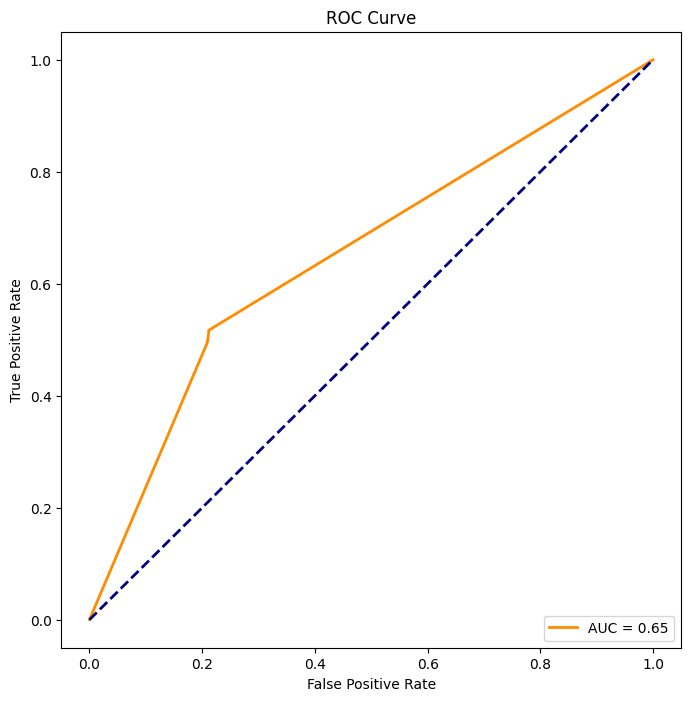

In [265]:
# Visulization

y_pred_prob = decision_tree_balanced.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_prob)

roc_auc = roc_auc_score(y_test_encoded, y_pred_prob)

# Plotting ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [266]:

# Creating a DataFrame with ROC curve information
df = pd.DataFrame(zip(fpr, tpr, thresholds), columns=['False Positive', 'True Positive', 'Threshold'])


df


,False Positive,True Positive,Threshold
0,0.000000,0.000000,inf
1,0.208895,0.494382,1.000000
2,0.208895,0.498127,0.857143
3,0.210243,0.498127,0.750000
4,0.210243,0.501873,0.666667
5,0.211590,0.513109,0.500000
6,0.211590,0.516854,0.200000
7,1.000000,1.000000,0.000000


`GOODNIGHT TEAM AZUBI`

# Business Impact 

`False Positive (FPR): 0.20`

`True Positive (TPR): 0.51`

`Threshold : 0.66`


Interpretation:
As the threshold decreases to 0.66, some customers are predicted as churning.
Business Impact: A 20% false positive rate means that 20% of non-churning customers are incorrectly predicted as churning, which might result in unnecessary retention efforts for these customers.
Row 3 (Threshold=0.666):


Implications:
Unnecessary retention efforts and resources may be allocated to customers who were not actually intending to churn.
Costs associated with targeted promotions, loyalty programs, or customer outreach.


Actionable Insights:
Evaluate the effectiveness of current retention strategies and identify areas for optimization.

In [267]:
voda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   bool   
 2   Partner           5043 non-null   bool   
 3   Dependents        5043 non-null   bool   
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   bool   
 6   MultipleLines     5043 non-null   bool   
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    5043 non-null   bool   
 9   OnlineBackup      5043 non-null   bool   
 10  DeviceProtection  5043 non-null   bool   
 11  TechSupport       5043 non-null   bool   
 12  StreamingTV       5043 non-null   bool   
 13  StreamingMovies   5043 non-null   bool   
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   bool   
 16  PaymentMethod     5043 non-null   object 


In [268]:
selection.get_support(indices=True)

# Use the name features/At

array([ 0,  1,  2,  9, 16, 17, 30, 32, 34, 37], dtype=int64)

# Insight 

`gender, SeniorCitizen, Partner, PaymentMethod, MonthlyCharges` 

These are the faetures/columns that have been used for the machine learning 

Utilizing these features for customer segmentation can help tailor marketing and retention strategies for different customer groups.
The inclusion of these features in a machine learning model suggests that they have predictive power in relation to the target variable in this case the churn.
Regularly monitoring the impact of these features and updating strategies based on changing trends is crucial for adapting to evolving customer behaviors.

Stakeholder Engagement:
Engage with relevant stakeholders, including marketing teams, customer service, and decision-makers.


In [269]:
# Create the 'models' directory if it doesn't exist
os.makedirs('./models/', exist_ok=True)

In [270]:


# models = [
#     ('tree_classifier', DecisionTreeClassifier(random_state=42)),
#     ('svc_classifier', SVC(random_state=42)),
#     ('rf_classifier', RandomForestClassifier(random_state=42)),
#     ('nb_classifier', GaussianNB()),
#     ('gb_classifier', GradientBoostingClassifier()),
# ]

# # Loop through each model
# for model_name, classifier in models:
#     pipeline = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('classifier', classifier),
#     ])

#     # Fit the pipeline on the resampled training data
#     pipeline.fit(X_train_resampled, y_train_resampled)

#     # Make predictions on the test set
#     y_pred = pipeline.predict(X_test)

#     # Print report for the model
#     print(f'Report for {model_name}')
#     print(classification_report(y_test_encoded, y_pred))
#     print('=' * 50)

  


In [271]:
import os
import joblib
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Hyperparameter GridSearchCV

In [272]:
joblib.dump(LabelEncoder,'./models/encoder.joblib')
joblib.dump(pipeline, f'./models/{model_name}.joblib')

['./models/nb_classifier.joblib']

In [ ]:
joblib.dump(pipeline, f'./models/{model_name}.joblib')
# Save the trained model
joblib.dump(decision_tree_balanced, './models/decision_tree_balanced.joblib')
# Save the LabelEncoder object
joblib.dump(label_encoder, './models/label_encoder.joblib')